In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

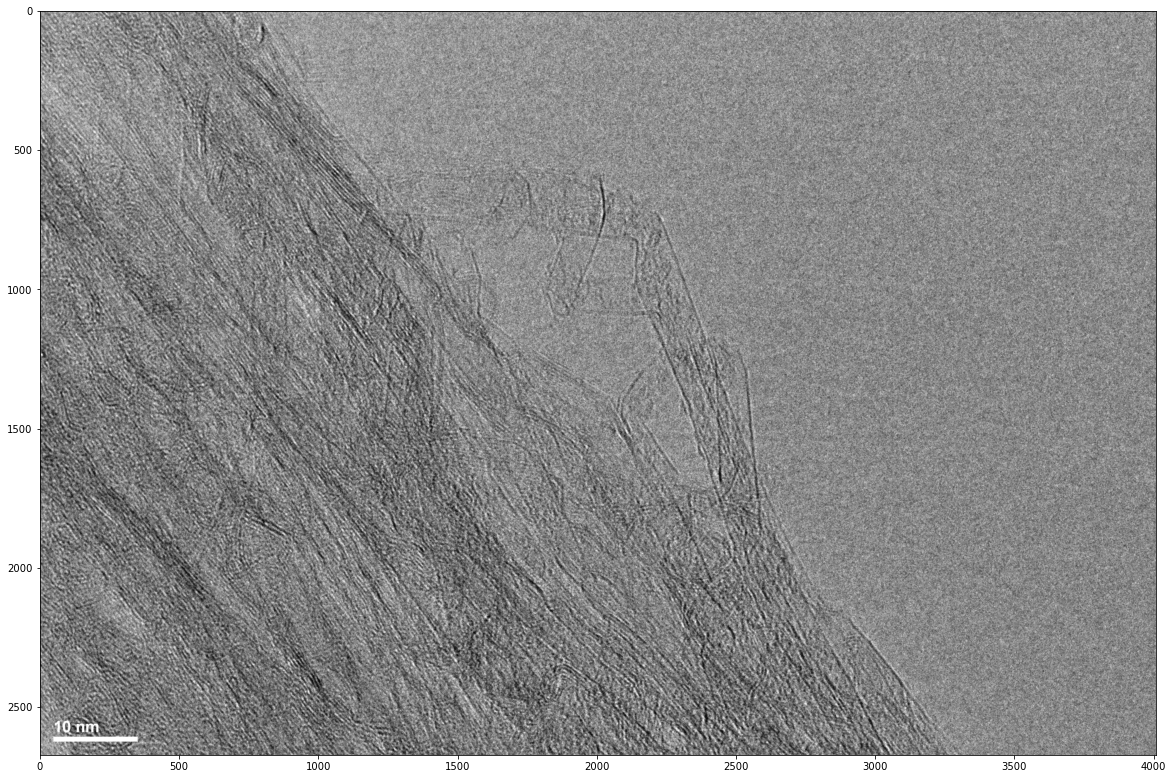

In [6]:
img = cv2.imread('../cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/01.jpg')
plt.figure(figsize = (20,16))
plt.imshow(img)

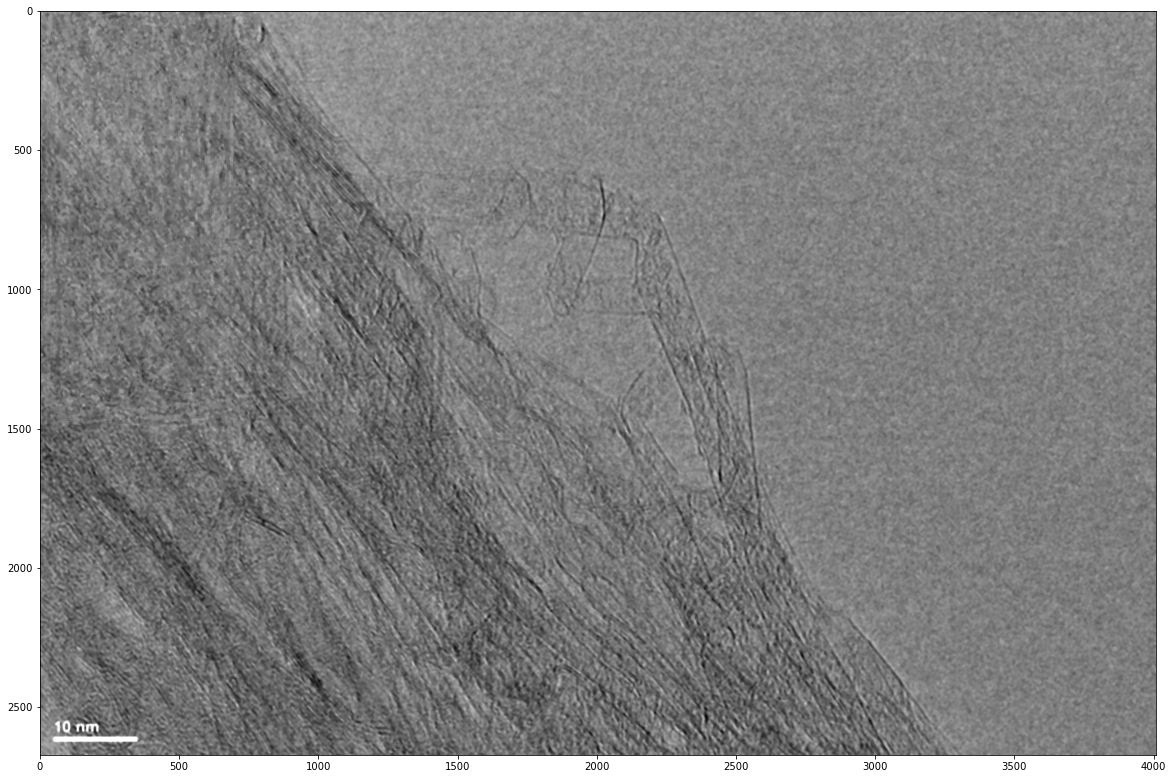

In [50]:
med	= cv2.medianBlur(gray, ksize = 11)
plt.figure(figsize = (20,16))
plt.imshow(med,cmap = "gray")



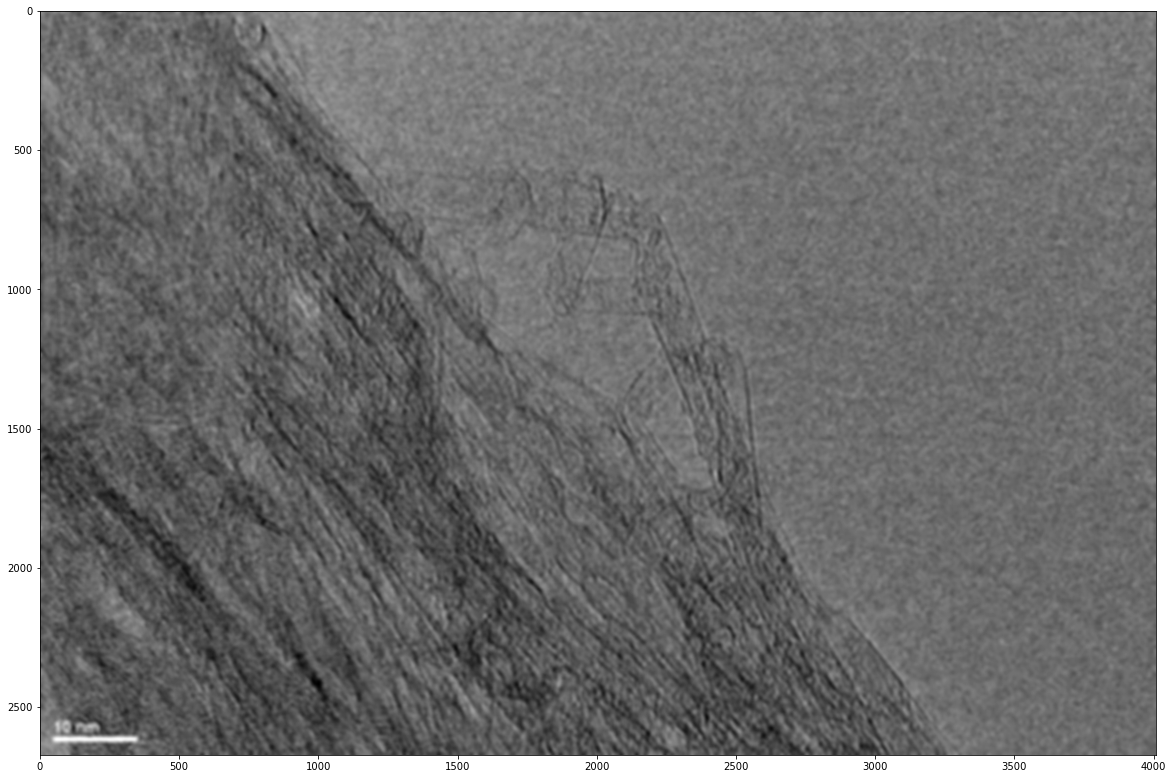

In [49]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 25
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),7)

plt.figure(figsize = (20,16))
plt.imshow(blur_gray,cmap = "gray")

True

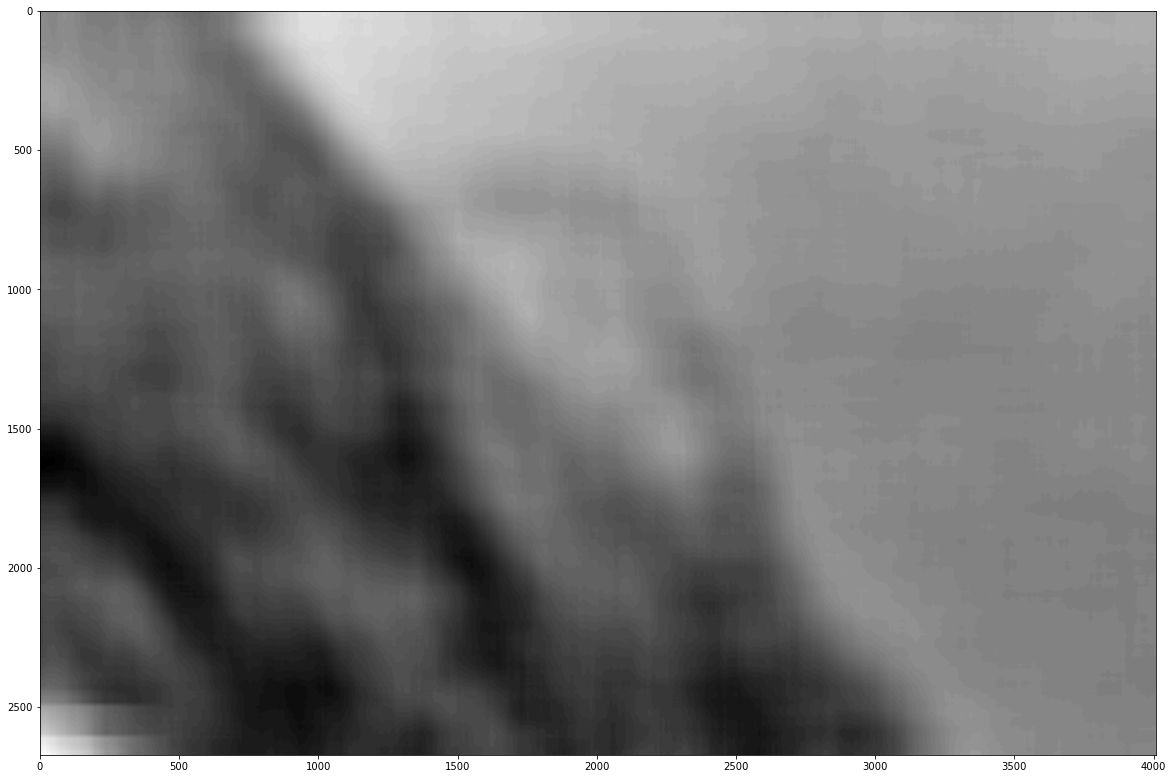

In [71]:
k_size = 250
kernel = np.ones((k_size,k_size),np.float32)/(k_size**2)
dst = cv2.filter2D(gray,-1,kernel)

plt.figure(figsize = (20,16))
plt.imshow(dst,cmap = "gray")
cv2.imwrite('250_box_blur.tif', dst)

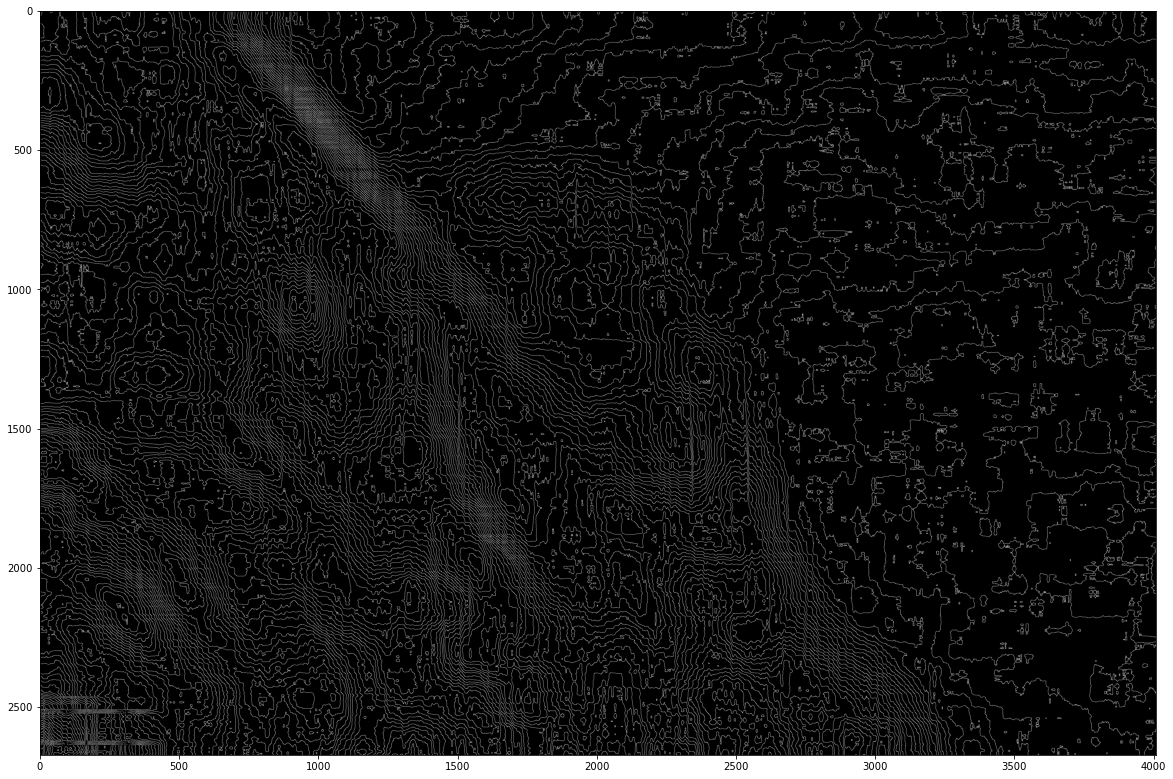

In [60]:
canny_blur = cv2.Canny(dst,20,60,apertureSize = 5)

plt.figure(figsize = (20,16))
plt.imshow(canny_blur,cmap = "gray")

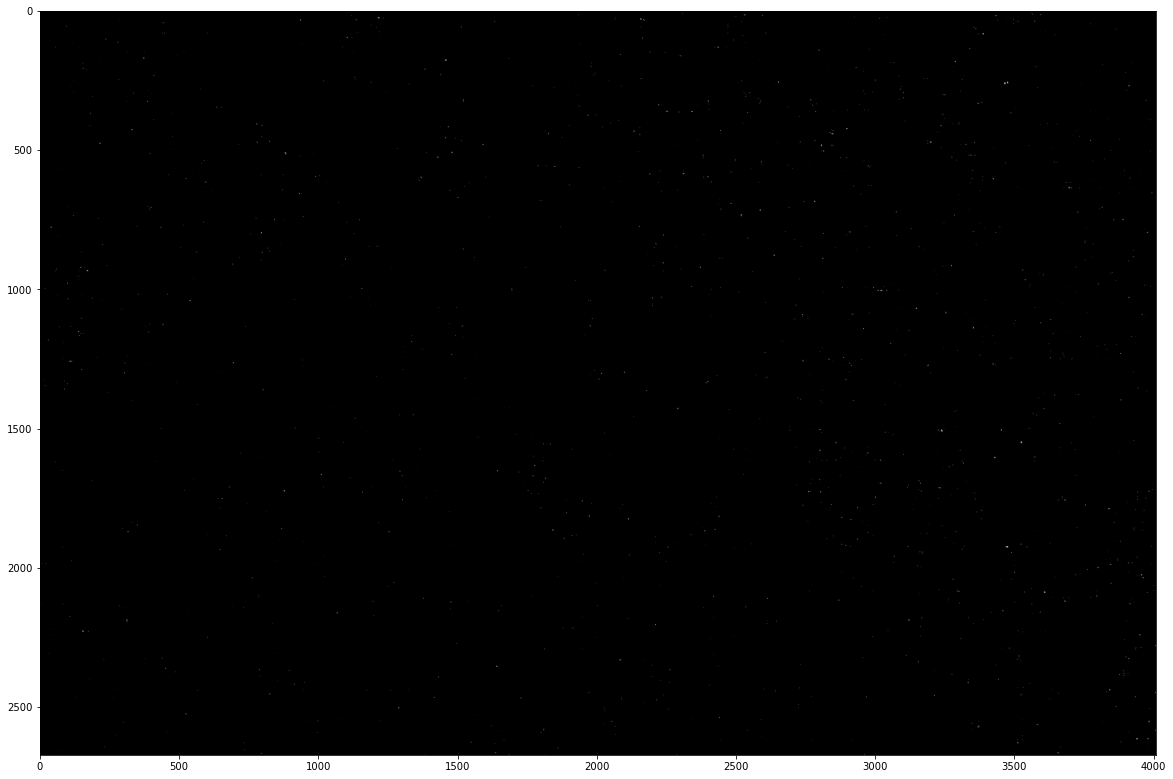

In [65]:
blur_edge_median	= cv2.medianBlur(canny_blur, ksize = 5)

plt.figure(figsize = (20,16))
plt.imshow(blur_edge_median,cmap = "gray")

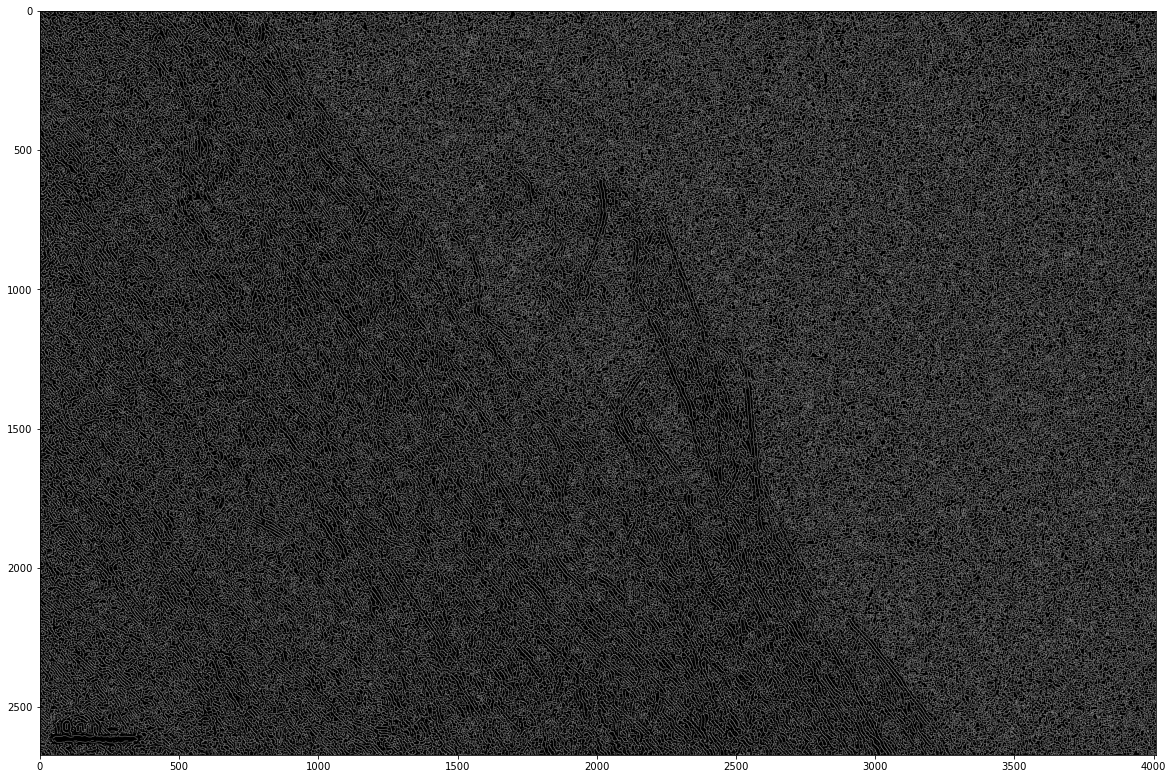

In [32]:
edges = cv2.Canny(blur_gray,50,150,apertureSize = 5)
plt.figure(figsize = (20,16))
plt.imshow(edges,cmap = "gray")

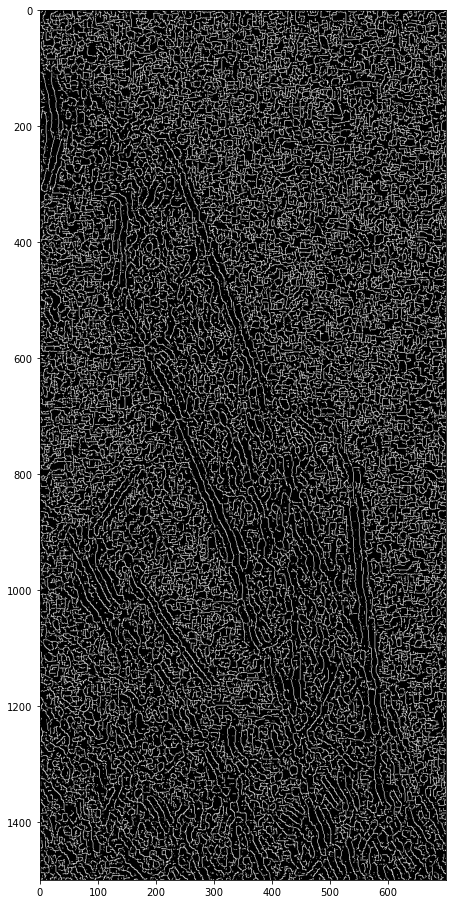

In [33]:
edges_cropped = edges[500:2000,2000:2700]
plt.figure(figsize = (20,16))
plt.imshow(edges_cropped,cmap = "gray")

#plt.xlim(1050,1300)
#plt.ylim(550,250)

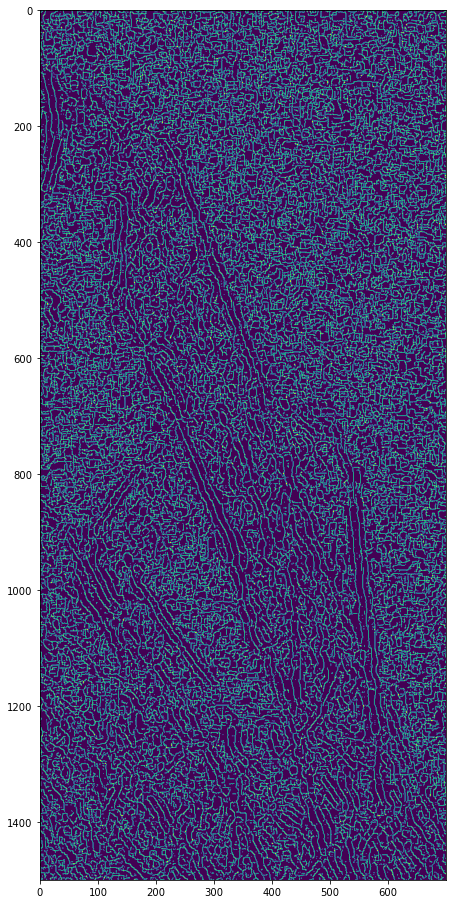

In [34]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 10  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = edges_cropped  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges_cropped, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

line_colors = (255,0,0)

'''
for line in lines: 
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2), (255 * np.random.rand(),255* np.random.rand(),255*np.random.rand()),1)
'''
plt.figure(figsize = (20,16))
        
        
plt.imshow(edges_cropped)
#plt.savefig('l')